Text(0.5,1,'Eigenvalues in sorted order')

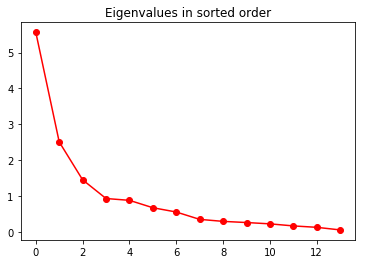

In [10]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

f = open("C:/Users/nacho/Downloads/wine.data", "r")

fl = f.readlines()
arr = np.empty((len(fl), 14))
for i in range(0, len(fl)):
    line = fl[i]
    line_ar = line.split(',')
    arr[i] = line_ar
arr = StandardScaler().fit_transform(arr)
cov = np.cov(arr.T)
w,v = np.linalg.eig(cov)
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[:,idx]
plt.plot(w, 'ro-')
plt.title('Eigenvalues in sorted order')

In [9]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(arr)
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [11]:
df_pca.head()


,principal component 1,principal component 2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773


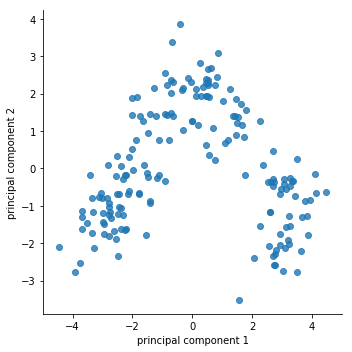

In [69]:
import seaborn as sns

pca_3 = PCA(n_components=3)
pc3 = pca_3.fit_transform(arr)
df_pc3 =  pd.DataFrame(data = principalComponents, columns = ['1', '2', '3'])
df_joined = pd.concat([df_pc3,df_pca], axis=1)
df_joined.head()
sns.lmplot('principal component 1', 'principal component 2', data=df_joined, fit_reg=False)